## 정규 방정식

-  비용 함수를 최소화하는 theta 값을 찾기 위한 해석적인 방법

In [23]:
# 선형 분포를 갖는 무작위 데이터 생성
import numpy as np
np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

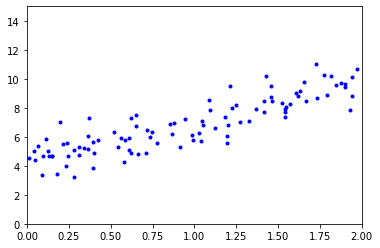

In [6]:
# 데이터 시각화
import matplotlib.pyplot as plt

plt.plot(X, y, 'b. ')
plt.axis([0, 2,0,15])
plt.show()

In [7]:
# bias 값 추가
# 모든 샘플에 x0 = 1 추가!
X_b = np.c_[np.ones((100,1)), X]

In [8]:
# 정규 방정식을 그대로 적용
# 이 데이터를 생성하기 위해 사용한 함수 : y=4 + 3x + 가우시안 노이즈
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best 
# y = 4.21 + 2.77x + bias 를 의미
# 결과값이 기대한 값 y = 4 + 3x + bias를 재현하지는 못했음

array([[4.21509616],
       [2.77011339]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1을 추가

In [11]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [12]:
X_new

array([[0],
       [2]])

In [13]:
# theta_best를 이용하여 X_new_b 의 입력에 대한 결과값 예측
y_predict = X_new_b.dot(theta_best)
y_predict


# --> 4.215 : x에 0을 줬을때 예측값, 9.75532293 : x에 2를 줬을때 예측값

array([[4.21509616],
       [9.75532293]])

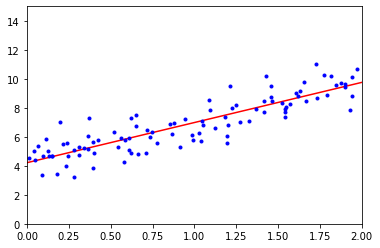

In [14]:
# 모델의 예측 그래프에 나타내기
plt.plot(X_new, y_predict, "-r")
plt.plot(X, y, "b. ")
plt.axis([0,2,0,15])
plt.show()

## 같은 작업을 하는 sklearn code

In [20]:
# 같은 작업을 하는 sklearn code
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# sklearn은 가중치(coeficient)와 편향(intercept)가 따로 저장되기 때문에 따로 출력
# 가중치가 기울기, 편향이 y절편 같은 느낌
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [22]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [24]:
np.linalg.pinv(X_b).dot(y) #유사행렬을 구해서 값을 구한다.

array([[4.21509616],
       [2.77011339]])

In [25]:
## Batch Gradient Descent Algorithm

alpha = 0.1 # learning rate (학습률)
n_iterations = 1000
m = 100 # # of samples (instances)

theta = np.random.randn(2,1) # 무작위로 theta값 설정

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

In [26]:
# 계산된 theta 출력
theta

array([[4.21509616],
       [2.77011339]])

In [27]:
## Batch Gradient Descent Algorithm

alpha = 0.001 # learning rate -> 학습률을 0.1에서 0.001로 변경
n_iterations = 1000
m = 100 # # of samples (instances)

theta = np.random.randn(2,1) # 무작위로 theta값 설정

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

In [28]:
# 학습률이 0.001일 경우
theta

array([[2.40839404],
       [4.30146812]])

In [30]:
## Batch Gradient Descent Algorithm

alpha = 1 # learning rate -> 학습률을 0.1에서 0.001로 변경
n_iterations = 1000
m = 100 # # of samples (instances)

theta = np.random.randn(2,1) # 무작위로 theta값 설정

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

In [31]:
# 학습률이 1일 경우
theta

array([[nan],
       [nan]])